In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv("/content/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

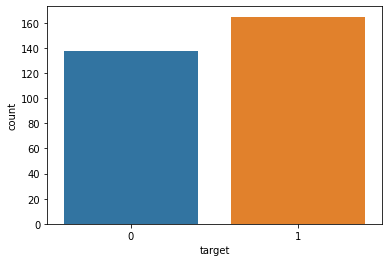

In [5]:
sns.countplot(x ='target',data=data)

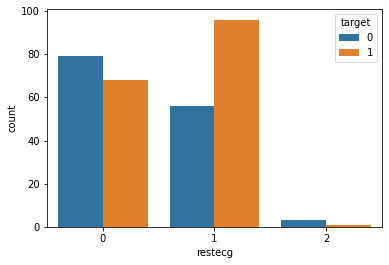

In [6]:
sns.countplot(x='restecg', hue='target', data=data)

In [7]:
x = data.drop('target',axis=1)

In [8]:
y = data['target']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.25, random_state=1)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
print(x.shape, xtrain.shape, xtest.shape)

(303, 13) (227, 13) (76, 13)


In [13]:
model = LogisticRegression()

In [15]:
model.fit(xtrain, ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
X_train_prediction = model.predict(xtrain)
training_data_accuracy = accuracy_score(X_train_prediction, ytrain)

In [17]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8678414096916299


In [18]:
X_test_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score(X_test_prediction, ytest)

In [19]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7894736842105263


In [20]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

In [23]:
print(classification_report(ytest,X_test_prediction))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.77      0.88      0.82        41

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



In [24]:
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


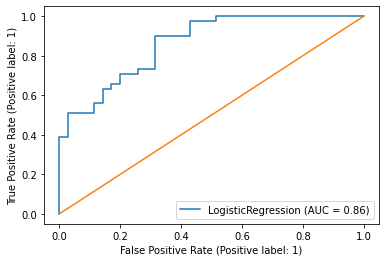

In [25]:
plot_roc_curve(model,xtest,ytest)
plt.plot([0,1],[0,1])

In [28]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [29]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(ytest,X_test_prediction)
cm

array([[24, 11],
       [ 5, 36]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


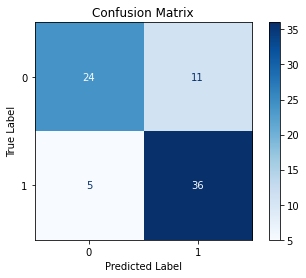

In [31]:
color = 'black'
matrix = plot_confusion_matrix(model, xtest, ytest, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()